<a href="https://colab.research.google.com/github/manikanta741/Data-Science/blob/main/Sentiment%20Analysis(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 2. Load or Create Sample Dataset
data = {
    'text': [
        "I love this phone!",
        "Worst experience ever",
        "Totally satisfied with the service",
        "Not happy with the product",
        "Amazing performance and camera",
        "Terrible customer support",
        "I am very disappointed",
        "Great value for money",
        "Wouldn't recommend this to anyone",
        "Best purchase I made"
    ],
    'sentiment': [
        'positive', 'negative', 'positive', 'negative', 'positive',
        'negative', 'negative', 'positive', 'negative', 'positive'
    ]
}

df = pd.DataFrame(data)

# 3. Preprocess
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 4. Split Data
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vectorize Text (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6. Train Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 7. Evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. Predict Custom Sentences
custom_texts = [
    "This is the best thing I've bought!",
    "Absolutely hate the service."
]
custom_vec = vectorizer.transform(custom_texts)
predictions = model.predict(custom_vec)

# 9. Show Predictions
for text, label in zip(custom_texts, predictions):
    print(f"\nText: {text}\nPrediction: {'Positive' if label else 'Negative'}")


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


Text: This is the best thing I've bought!
Prediction: Positive

Text: Absolutely hate the service.
Prediction: Positive


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [4]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 2. Sample Restaurant Review Dataset
data = {
    'Review': [
        "The food was absolutely wonderful!",
        "The waiter was very rude.",
        "I had a great time, the ambiance is perfect.",
        "The food was cold and tasteless.",
        "Amazing service and delicious dishes!",
        "Not coming here again. Worst experience.",
        "Loved the pasta and the friendly staff.",
        "Waited for 30 minutes, nobody came to take order.",
        "It was a delightful evening. Highly recommend!",
        "Horrible food and unclean table!"
    ],
    'Sentiment': [
        'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative'
    ]
}

df = pd.DataFrame(data)

# 3. Preprocess: Convert sentiment to binary
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# 4. Split into training and testing data
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vectorize reviews using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# 6. Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# 7. Evaluate the model
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8. Predict sentiment for custom reviews
custom_reviews = [
    "The biryani was fantastic and perfectly spiced.",
    "The staff ignored us for 20 minutes, horrible experience.",
    "Loved the desserts and quick service.",
    "The food was cold and tasteless"

]

custom_vec = tfidf.transform(custom_reviews)
predictions = model.predict(custom_vec)

# 9. Display predictions
print("\n--- Predictions on Custom Reviews ---")
for review, label in zip(custom_reviews, predictions):
    print(f"\nReview: {review}\nPrediction: {'Positive' if label else 'Negative'}")


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


--- Predictions on Custom Reviews ---

Review: The biryani was fantastic and perfectly spiced.
Prediction: Positive

Review: The staff ignored us for 20 minutes, horrible experience.
Prediction: Negative

Review: Loved the desserts and quick service.
Prediction: Positive

Review: The food was cold and tasteless
Prediction: Negative


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


   Atmosphere Atmosphere_Sentiment  Food Food_Sentiment  Service  \
0         4.4              Neutral   4.5        Neutral      4.5   
1         4.6              Neutral   4.1        Neutral      4.3   
2         4.4              Neutral   4.5        Neutral      4.1   
3         4.5              Neutral   4.7        Neutral      4.6   
4         0.0              Neutral   0.0        Neutral      0.0   

  Service_Sentiment  
0           Neutral  
1           Neutral  
2           Neutral  
3           Neutral  
4           Neutral  


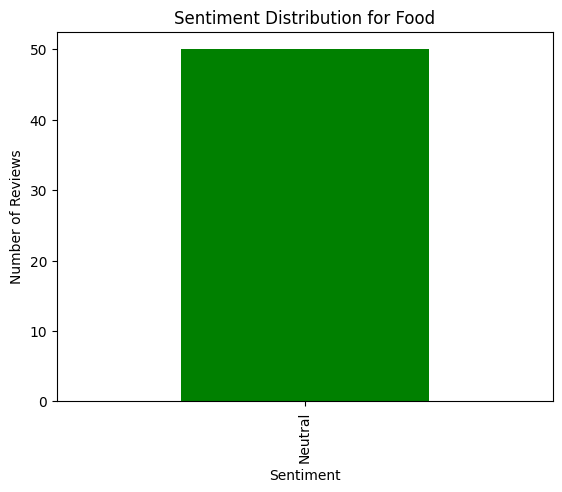


--- Prediction on New Input ---
Atmosphere: "The ambiance was warm and cozy, perfect for a date night." => Sentiment: Positive
Food: "The pasta was undercooked and lacked flavor." => Sentiment: Neutral
Service: "The waiter was very attentive and polite." => Sentiment: Positive


In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/restaraunts_tallin.csv")

# Define sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply to multiple columns
for col in ['Atmosphere', 'Food', 'Service']:
    df[f'{col}_Sentiment'] = df[col].apply(get_sentiment)

# Display sample results
print(df[['Atmosphere', 'Atmosphere_Sentiment',
          'Food', 'Food_Sentiment',
          'Service', 'Service_Sentiment']].head())

# Plot sentiment distribution for 'Food'
df['Food_Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'grey'])
plt.title("Sentiment Distribution for Food")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# ---------------------------------------------
# Prediction on New Input (Manual Entry)
# ---------------------------------------------
# Sample new review input
sample_input = {
    "Atmosphere": "The ambiance was warm and cozy, perfect for a date night.",
    "Food": "The pasta was undercooked and lacked flavor.",
    "Service": "The waiter was very attentive and polite."
}

# Predict sentiment for each input field
print("\n--- Prediction on New Input ---")
for key, value in sample_input.items():
    sentiment = get_sentiment(value)
    print(f"{key}: \"{value}\" => Sentiment: {sentiment}")
